# spaCy and NLTK

https://www.youtube.com/watch?v=h2kBNEShsiE&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=7

https://www.youtube.com/watch?v=hKK59rfpXL0&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=9


spaCy: object-oriented

NLTK: string processing library

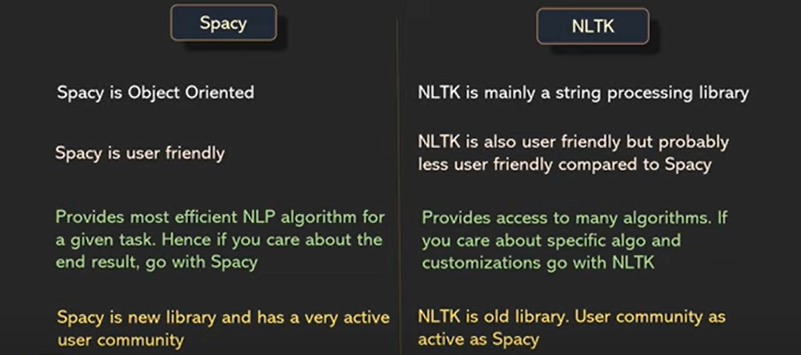

## Sentence and word tokenization in spaCy and NLTK

In [74]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [75]:
# make an object (doc) from the string
doc = nlp('Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi')

In [76]:
# sentence tokenization in spacy
# spacy splits doc into sentences, not just using .

# iterate over the object with its sents attribute
for sentence in doc.sents:
    print(sentence)

Dr. Strange loves pav bhaji of mumbai.
Hulk loves chaat of delhi


In [77]:
# word tokenization in spacy
for sentence in doc.sents:
    for word in sentence:
        print(word)

Dr.
Strange
loves
pav
bhaji
of
mumbai
.
Hulk
loves
chaat
of
delhi


In [78]:
import nltk
# nltk.download()
# nltk.download('punkt')

In [79]:
# sentence tokenization in nltk
from nltk.tokenize import sent_tokenize # there are many tokenizer options to import;
# nltk allows for customization

# pass string (not object) directly to sentence tokenizer
sent_tokenize('Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi')

['Dr.', 'Strange loves pav bhaji of mumbai.', 'Hulk loves chaat of delhi']

In [80]:
from nltk.tokenize import word_tokenize

# pass string (not object) directly to word tokenizer
word_tokenize('Dr. Strange loves pav bhaji of mumbai. Hulk loves chaat of delhi')

['Dr',
 '.',
 'Strange',
 'loves',
 'pav',
 'bhaji',
 'of',
 'mumbai',
 '.',
 'Hulk',
 'loves',
 'chaat',
 'of',
 'delhi']

## spaCy pipeline

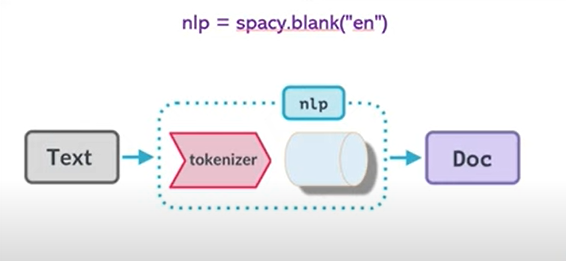

- blank spaCy pipeline gets tokenizer by default, but nothing else
- converts text to a doc object

In [81]:
nlp = spacy.blank('en')

doc = nlp("Captain america ate 100$ of samosa. THen he said I can do this all day.")

for token in doc:
    print(token)

Captain
america
ate
100
$
of
samosa
.
THen
he
said
I
can
do
this
all
day
.


In [82]:
# nlp.pipe_names is blank because there is nothing in the pipeline
nlp.pipe_names

[]

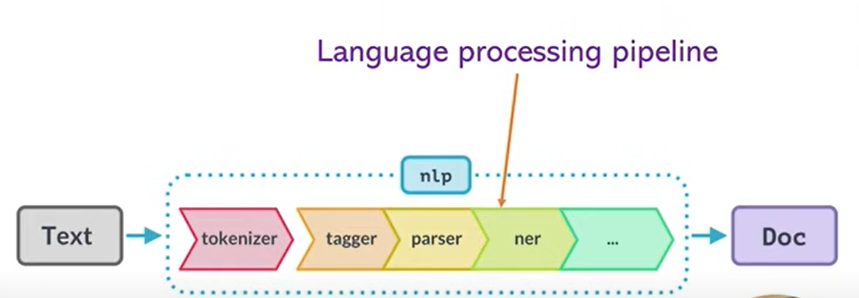

In [83]:
# to download pre-trained pipeline (can find options in spaCy's documentation)
# in git bash:
# python -m spacy download <name of pipeline> (ex. en_core_web_sm)

nlp = spacy.load('en_core_web_sm')

nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [84]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x21a1f7033a0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x21a1f6c6d00>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x21a1b7435f0>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x21a1f8593c0>),
 ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x21a1f7b0580>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x21a1b743820>)]

In [85]:
# now can access more information for each token in doc with trained pipeline

doc = nlp("Captain america ate 100$ of samosa. THen he said I can do this all day.")

for token in doc:
    print(token, token.pos_, token.lemma_)

# tagger gives you pos
# lemmatizer gives you lemma

Captain PROPN Captain
america PROPN america
ate VERB eat
100 NUM 100
$ NUM $
of ADP of
samosa NOUN samosa
. PUNCT .
THen ADV then
he PRON he
said VERB say
I PRON I
can AUX can
do VERB do
this PRON this
all DET all
day NOUN day
. PUNCT .


In [86]:
# ner gives you named entities

doc = nlp('Tesla Inc is going to acquire twitter for $45 billion')

for ent in doc.ents:
    print(ent.text, ent.label_, spacy.explain(ent.label_))

Tesla Inc ORG Companies, agencies, institutions, etc.
$45 billion MONEY Monetary values, including unit


In [87]:
# to display a doc in a pretty way
from spacy import displacy

displacy.render(doc, style = 'ent')

In [88]:
# to add a component of a pipeline (like ner, tagger, lemmatizer, etc.) to a 
# blank pipeline (so the pipeline only has what you need):

# load pipeline with the component you want
source_nlp = spacy.load('en_core_web_sm')

# load a blank pipeline
nlp = spacy.blank('en')

# add the component you want to the blank pipeline
nlp.add_pipe('ner', source = source_nlp)

# check
nlp.pipe_names

['ner']

## Stemming and Lemmatization

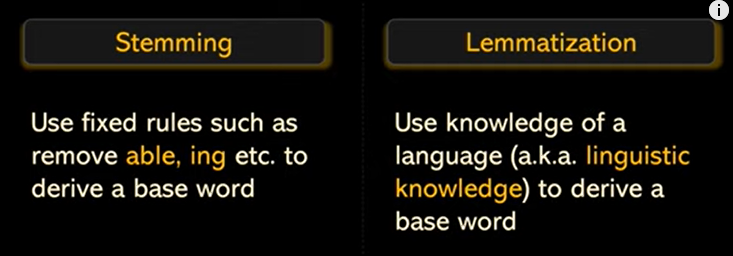

- spaCy only supports lemmatization (not stemming)
- NLTK supports both stemming and lemmatization

In [89]:
# stemming in nltk

from nltk.stem import PorterStemmer

stemmer = PorterStemmer()

words = ['eating', 'eats', 'eat', 'ate', 'adjustable', 'rafting', 'ability', 'meeting', 'better']

for word in words:
    print(word, stemmer.stem(word))

eating eat
eats eat
eat eat
ate ate
adjustable adjust
rafting raft
ability abil
meeting meet
better better


In [90]:
# lemmatization in spaCy
nlp = spacy.load('en_core_web_sm')

doc = nlp('eating eats eat ate adjustable rafting ability meeting better')

for token in doc:
    print(token, token.lemma_, token.lemma)

# lemma_ will give the lemma
# lemma will give the unique hash of the lemma

eating eat 9837207709914848172
eats eat 9837207709914848172
eat eat 9837207709914848172
ate eat 9837207709914848172
adjustable adjustable 6033511944150694480
rafting raft 7154368781129989833
ability ability 11565809527369121409
meeting meeting 14798207169164081740
better well 4525988469032889948


In [91]:
doc = nlp("Mando talked for 3 hours although talking isn't his thing he became talkative")

for token in doc:
    print(token, token.lemma_, token.lemma)

Mando Mando 7837215228004622142
talked talk 13939146775466599234
for for 16037325823156266367
3 3 602994839685422785
hours hour 9748623380567160636
although although 343236316598008647
talking talk 13939146775466599234
is be 10382539506755952630
n't not 447765159362469301
his his 2661093235354845946
thing thing 2473243759842082748
he he 1655312771067108281
became become 12558846041070486771
talkative talkative 13364764166055324990


In [92]:
# check out the components of the spacy pipeline we're using
nlp.pipe_names

# attribute_ruler assigns an attribute to a particular token
# this can be customized/modified as you want

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [93]:
doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted brother.")

for token in doc:
    print(token.text, token.lemma_)

Bro bro
, ,
you you
wanna wanna
go go
? ?
Brah Brah
, ,
do do
n't not
say say
no no
! !
I I
am be
exhausted exhausted
brother brother
. .


In [94]:
# if you know 'bro' and 'brah' should have the same lemma, you can change it

# get attribute_ruler from pipeline
ar = nlp.get_pipe('attribute_ruler')

ar.add([[{'TEXT': 'Bro'}],[{'TEXT': 'Brah'}]], {'LEMMA': 'brother'})

doc = nlp("Bro, you wanna go? Brah, don't say no! I am exhausted brother.")

for token in doc:
    print(token.text, token.lemma_)

Bro brother
, ,
you you
wanna wanna
go go
? ?
Brah brother
, ,
do do
n't not
say say
no no
! !
I I
am be
exhausted exhausted
brother brother
. .


In [95]:
doc[0]

Bro

In [96]:
doc[0].lemma_

'brother'

## Part of Speech in spaCy

In [97]:
import spacy

In [98]:
nlp = spacy.load("en_core_web_sm")

In [99]:
doc = nlp("Elon flew to mars yesterday. He carried biryani masala with him")

for token in doc:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_))

Elon PROPN 96 proper noun
flew VERB 100 verb
to ADP 85 adposition
mars NOUN 92 noun
yesterday NOUN 92 noun
. PUNCT 97 punctuation
He PRON 95 pronoun
carried VERB 100 verb
biryani ADJ 84 adjective
masala NOUN 92 noun
with ADP 85 adposition
him PRON 95 pronoun


In [100]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [101]:
doc = nlp("Wow! Dr. Strange made $265 million on the very first day.")

for token in doc:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_), token.tag_,
         spacy.explain(token.tag_))
    
# tag_ is a further categorization of pos_; for example, see below pos_ is VERB
# and tag_ is VBD (verb, past tense)

Wow INTJ 91 interjection UH interjection
! PUNCT 97 punctuation . punctuation mark, sentence closer
Dr. PROPN 96 proper noun NNP noun, proper singular
Strange PROPN 96 proper noun NNP noun, proper singular
made VERB 100 verb VBD verb, past tense
$ SYM 99 symbol $ symbol, currency
265 NUM 93 numeral CD cardinal number
million NUM 93 numeral CD cardinal number
on ADP 85 adposition IN conjunction, subordinating or preposition
the DET 90 determiner DT determiner
very ADV 86 adverb RB adverb
first ADJ 84 adjective JJ adjective (English), other noun-modifier (Chinese)
day NOUN 92 noun NN noun, singular or mass
. PUNCT 97 punctuation . punctuation mark, sentence closer


In [102]:
doc = nlp("He quits the job.")

print(doc[1])
print(doc[1].text, doc[1].tag_, spacy.explain(doc[1].tag_))

quits
quits VBZ verb, 3rd person singular present


In [103]:
doc = nlp("He quit the job.")

print(doc[1])
print(doc[1].text, doc[1].tag_, spacy.explain(doc[1].tag_))

quit
quit VBD verb, past tense


In [104]:
# remove all punctuation marks and extra characters from a text

earnings_text="""Microsoft Corp. today announced the following results for the quarter ended December 31, 2021, as compared to the corresponding period of last fiscal year:

·         Revenue was $51.7 billion and increased 20%
·         Operating income was $22.2 billion and increased 24%
·         Net income was $18.8 billion and increased 21%
·         Diluted earnings per share was $2.48 and increased 22%
“Digital technology etc. is the most malleable resource at the world’s disposal to overcome constraints and reimagine everyday work and life,” said Satya Nadella, chairman and chief executive officer of Microsoft. “As tech as a percentage of global GDP continues to increase, we are innovating and investing across diverse and growing markets, with a common underlying technology stack and an operating model that reinforces a common strategy, culture, and sense of purpose.”
“Solid commercial execution, represented by strong bookings growth driven by long-term Azure commitments, increased Microsoft Cloud revenue to $22.1 billion, up 32% year over year” said Amy Hood, executive vice president and chief financial officer of Microsoft."""

doc = nlp(earnings_text)

In [105]:
# this includes things like spaces, and 'other', which you don't want:

for token in doc:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_))

Microsoft PROPN 96 proper noun
Corp. PROPN 96 proper noun
today NOUN 92 noun
announced VERB 100 verb
the DET 90 determiner
following VERB 100 verb
results NOUN 92 noun
for ADP 85 adposition
the DET 90 determiner
quarter NOUN 92 noun
ended VERB 100 verb
December PROPN 96 proper noun
31 NUM 93 numeral
, PUNCT 97 punctuation
2021 NUM 93 numeral
, PUNCT 97 punctuation
as SCONJ 98 subordinating conjunction
compared VERB 100 verb
to ADP 85 adposition
the DET 90 determiner
corresponding ADJ 84 adjective
period NOUN 92 noun
of ADP 85 adposition
last ADJ 84 adjective
fiscal ADJ 84 adjective
year NOUN 92 noun
: PUNCT 97 punctuation


 SPACE 103 space
· PUNCT 97 punctuation
         SPACE 103 space
Revenue NOUN 92 noun
was AUX 87 auxiliary
$ SYM 99 symbol
51.7 NUM 93 numeral
billion NUM 93 numeral
and CCONJ 89 coordinating conjunction
increased VERB 100 verb
20 NUM 93 numeral
% NOUN 92 noun

 SPACE 103 space
· PUNCT 97 punctuation
         SPACE 103 space
Operating VERB 100 verb
income NOUN 92 no

In [106]:
# filter certain tokens out of doc:

filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE", "PUNCT", "X"]:
        filtered_tokens.append(token)
        
for token in filtered_tokens:
    print(token, token.pos_, token.pos, spacy.explain(token.pos_))

Microsoft PROPN 96 proper noun
Corp. PROPN 96 proper noun
today NOUN 92 noun
announced VERB 100 verb
the DET 90 determiner
following VERB 100 verb
results NOUN 92 noun
for ADP 85 adposition
the DET 90 determiner
quarter NOUN 92 noun
ended VERB 100 verb
December PROPN 96 proper noun
31 NUM 93 numeral
2021 NUM 93 numeral
as SCONJ 98 subordinating conjunction
compared VERB 100 verb
to ADP 85 adposition
the DET 90 determiner
corresponding ADJ 84 adjective
period NOUN 92 noun
of ADP 85 adposition
last ADJ 84 adjective
fiscal ADJ 84 adjective
year NOUN 92 noun
Revenue NOUN 92 noun
was AUX 87 auxiliary
$ SYM 99 symbol
51.7 NUM 93 numeral
billion NUM 93 numeral
and CCONJ 89 coordinating conjunction
increased VERB 100 verb
20 NUM 93 numeral
% NOUN 92 noun
Operating VERB 100 verb
income NOUN 92 noun
was AUX 87 auxiliary
$ SYM 99 symbol
22.2 NUM 93 numeral
billion NUM 93 numeral
and CCONJ 89 coordinating conjunction
increased VERB 100 verb
24 NUM 93 numeral
% NOUN 92 noun
Net ADJ 84 adjective
inc

In [107]:
# count how many nouns, verbs, etc. are present
count = doc.count_by(spacy.attrs.POS)
count

{96: 13,
 92: 46,
 100: 24,
 90: 9,
 85: 16,
 93: 16,
 97: 27,
 98: 1,
 84: 20,
 103: 10,
 87: 6,
 99: 5,
 89: 12,
 101: 2,
 86: 3,
 94: 3,
 95: 2}

In [108]:
doc.vocab[96].text

'PROPN'

In [109]:
for k, v in count.items():
    print(doc.vocab[k].text, v)

PROPN 13
NOUN 46
VERB 24
DET 9
ADP 16
NUM 16
PUNCT 27
SCONJ 1
ADJ 20
SPACE 10
AUX 6
SYM 5
CCONJ 12
X 2
ADV 3
PART 3
PRON 2


## NER in spaCy

In [110]:
import spacy
nlp = spacy.load("en_core_web_sm")

In [111]:
nlp.pipe_names

['tok2vec', 'tagger', 'parser', 'attribute_ruler', 'lemmatizer', 'ner']

In [112]:
doc = nlp("Tesla Inc is going to acquire Twitter for $45 billion.")

In [113]:
# iterate over all entities (ent) in doc.ents
for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Tesla Inc  |  ORG  |  Companies, agencies, institutions, etc.
Twitter  |  PRODUCT  |  Objects, vehicles, foods, etc. (not services)
$45 billion  |  MONEY  |  Monetary values, including unit


In [114]:
# display
displacy.render(doc, style = "ent")

In [115]:
# check out all the entities that spacy supports
nlp.pipe_labels["ner"]

['CARDINAL',
 'DATE',
 'EVENT',
 'FAC',
 'GPE',
 'LANGUAGE',
 'LAW',
 'LOC',
 'MONEY',
 'NORP',
 'ORDINAL',
 'ORG',
 'PERCENT',
 'PERSON',
 'PRODUCT',
 'QUANTITY',
 'TIME',
 'WORK_OF_ART']

In [116]:
doc = nlp("Michael Bloomberg founded Bloomberg in 1982.")

for ent in doc.ents:
    print(ent.text, " | ", ent.label_, " | ", spacy.explain(ent.label_))

Michael Bloomberg  |  PERSON  |  People, including fictional
Bloomberg  |  PERSON  |  People, including fictional
1982  |  DATE  |  Absolute or relative dates or periods


In [117]:
# NER in spaCy is not perfect; above it recognized Bloomberg as a person 
# instead of the company

# hugging face ner: https://huggingface.co/dslim/bert-base-NER
# this ner can tell the diff between the person and company in the above doc

# ner capability depends on the training data it was trained on

In [129]:
# you can add your own named entities to your spacy nlp pipeline if you want
# it to recgonize something it doesn't recognize

doc = nlp("teslay is going to acquire twitter for $45 billion.")

for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

$45 billion  |  MONEY


In [130]:
# grab the span that represents the named entity
# span can be one to any number of words found side-by-side in a doc
# can use python's splice functionality to grab more than one word
# use splicing even if you only want to grab one word (if you grab just
# one word without splicing, it will count as a token not a span)

doc[2:5]

going to acquire

In [131]:
type(doc[2:5])

spacy.tokens.span.Span

In [132]:
from spacy.tokens import Span

s1 = Span(doc, 0, 1, label = "ORG")
s2 = Span(doc, 5, 6, label = "ORG")

doc.set_ents([s1, s2], default = "unmodified")

In [133]:
for ent in doc.ents:
    print(ent.text, " | ", ent.label_)

teslay  |  ORG
twitter  |  ORG
$45 billion  |  MONEY


In [ ]:
# how to create your own ner

# approach 1 (hard-coded): simple lookup: make a list of companies, locations,
# etc. and keep adding to them as you discover new ones

# approach 2: rule-based ner: spacy has a class "EntityRuler"
# https://ner.pythonhumanities.com/01_01_introduction_to_ner.html

# appreach 3: machine learning: crf (conditional random fields), bert

## Feature Engineering

A process of extracting features from raw data

In NLP, also called text representation

https://www.youtube.com/watch?v=_3ahmI5vpKY&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=14

What are features for words?

Vector Space Model/Feature vector approach: if you have a word, you can break it down to its semantic component parts and give a number to each component. Example for word "cat": has ears: 1, has hooves: 0, meows: 1, is fast: 0.87, etc. The list of these numbers represents the word as its feature vector.

With feature vectors, we can check to see how similar words are to each other with cosine similarity.

Approaches to converting words to vectors: one-hot encoding, bag of words, tf-idf, word embeddings

## Label and One-Hot Encoding

https://www.youtube.com/watch?v=2d8iP2_cS-U&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=14

Label encoding: get a list of all the words that are used in the texts in your training dataset; this is your vocabulary. Assign each of them a unique identifier. For a new text, represent the text with a list of numbers, each number of which corresponds to the id of the word in your vocabulary. So, the list of numbers is the same length as the text, and each number corresponds to the word in the text in the same position. 

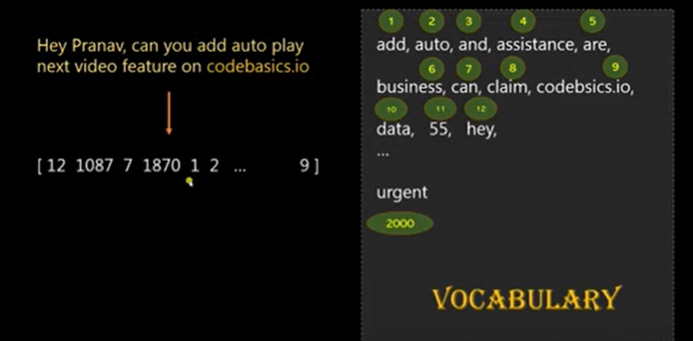

One-Hot Encoding: Get your vocabulary as in label encoding. Represent a new text with a list of lists. The outer list is the length of the text. Each inner list corresponds to a word in the text, and is the length of your vocabulary. Each inner list has a 1 in the position that matches the position of the word in the vocabulary, and a 0 in all other columns.

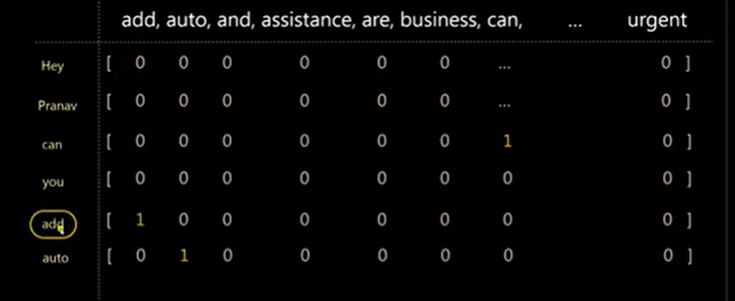

Disadvantages of these approaches:
- No fixed length representation (different text sizes are represented with different vector lengths, which cannot work for a neural network, for example, which needs data that are all the same size)
- Doesn't capture similarity in meaning across words (e.g., vectors for 'help' and 'assistance' are completely unrelated vectors)
- If word isn't in training set, the model doesn't have a representation for it and therefore can't use it in classification (the out of vocabulary problem)
- Representing words as one-hot encoded vectors uses a prohibitive amount of memory (each vector may be 100k elements long, for example, and then to store one 500-word text would be 50,000,000 elements)

## Bag of Words

https://www.youtube.com/watch?v=Yt1Sw6yWjlw&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=15

- Create a vocabulary of all the terms in all documents
- Do a word count for each article you want to classify; count how many times each word in the vocabulary appears in the article
- The word count is also called a count vectorizer
- Sparse representation in vectors, but better than one-hot encoding (one ohe one word is one long vector; in bag of words one article/document is one long vector)
- BoW still doesn't capture similarity between articles well

Example: spam detection using bag of words and naive bayes classifier

Flow:
0. Preprocessing: stemming, lemmatization
1. Raw text: create vocabulary (all words in all articles)
2. Number vector: each article converted to a vector, representing count of number of each word in vocabulary
3. Machine learning

In [11]:
# load data
import pandas as pd

df = pd.read_csv('bag_of_words.csv')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        5574 non-null   object
 1   text        5574 non-null   object
 2   Unnamed: 2  1 non-null      object
dtypes: object(3)
memory usage: 130.8+ KB


In [13]:
df[~df['Unnamed: 2'].isna()]

,type,text,Unnamed: 2
5083,ham\tHI BABE UAWAKE?FEELLIKW SHIT.JUSTFOUND OU...,DEVIOUSBITCH.ANYWAY,"IL CALL U"""""""


In [17]:
df.drop(5083, inplace = True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5573 entries, 0 to 5573
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   type        5573 non-null   object
 1   text        5573 non-null   object
 2   Unnamed: 2  0 non-null      object
dtypes: object(3)
memory usage: 174.2+ KB


In [19]:
df.drop(columns = 'Unnamed: 2', inplace = True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5573 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5573 non-null   object
 1   text    5573 non-null   object
dtypes: object(2)
memory usage: 130.6+ KB


In [21]:
df['type'].value_counts()

ham          4825
spam          747
ham\tYeah       1
Name: type, dtype: int64

In [23]:
df[df['type'] == 'ham\tYeah']

,type,text
5082,ham\tYeah,give me a call if you've got a minute


In [24]:
df.drop(5082, inplace = True)

In [25]:
df['type'].value_counts()

ham     4825
spam     747
Name: type, dtype: int64

This is an imbalanced dataset. In a real-world situation, we would want to deal with this imbalance. Since we are focusing on using Bag of Words in NLP now, we will use the dataset as-is.

In [30]:
# convert 'ham' and 'spam' to numbers (0, 1)

df['is_spam'] = df['type'].map({'spam': 1, 'ham': 0})

# alternative way:
# df['new_col'] = df['col1'].apply(lambda x: 1 if x == 'spam' else 0)

# alternative way:
# def get_spam_number(x):
#     if x == 'spam':
#         return 1
#     else:
#         return 0

# df['new_col'] = df['col1'].apply(get_spam_number(x))


In [31]:
df['is_spam'].value_counts()

0    4825
1     747
Name: is_spam, dtype: int64

In [32]:
df.drop(columns = 'type', inplace = True)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5572 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     5572 non-null   object
 1   is_spam  5572 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 130.6+ KB


In [34]:
# train/test split
from sklearn.model_selection import train_test_split

# designate X first, then y
X_train, X_test, y_train, y_test = train_test_split(df['text'], 
                                                    df['is_spam'],
                                                    test_size = 0.2)

In [36]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(4457,) (1115,) (4457,) (1115,)


In [37]:
# use sklearn's countvectorizer
from sklearn.feature_extraction.text import CountVectorizer

v = CountVectorizer()

# fit and transform training data texts to count vectors
X_train_cv = v.fit_transform(X_train)
X_train_cv

<4457x7639 sparse matrix of type '<class 'numpy.int64'>'
	with 58543 stored elements in Compressed Sparse Row format>

In [38]:
# can see the sparse matrix by converting to an array
X_train_cv.toarray()[:1][0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
# since these are sparse, if you want to see only the indexes that have a 
# number in them, can use:

import numpy as np

# first, convert X_train_cv to a numpy array
X_train_np = X_train_cv.toarray()
print(X_train_np[0])

# then do np.where for the number of the text you want to see the non-zero
# array numbers for
print(np.where(X_train_np[4] != 0))

# this shows a list of indexes where the 4th text is not 0

[0 0 0 ... 0 0 0]
(array([ 952, 1113, 1328, 1384, 1567, 2779, 2922, 2983, 3733, 3902, 4011,
       4060, 4248, 4616, 4764, 4778, 4827, 4983, 5144, 6464, 7079, 7513,
       7583], dtype=int64),)


In [39]:
# see the shape of one vector
X_train_cv.shape

# 7,639 words in the vocabulary

(4457, 7639)

In [40]:
# to get the words in the vocabulary:
v.get_feature_names_out()

array(['00', '000', '000pes', ..., 'zyada', 'èn', 'ú1'], dtype=object)

In [42]:
# alternative to v.get_feature_names_out(): 
v.vocabulary_

{'ok': 4850,
 'two': 6992,
 'fundamentals': 3024,
 'of': 4827,
 'cool': 1998,
 'life': 4050,
 'walk': 7252,
 'like': 4060,
 'you': 7598,
 'are': 1045,
 'the': 6719,
 'king': 3905,
 'or': 4908,
 'dont': 2399,
 'care': 1645,
 'whoever': 7385,
 'is': 3716,
 'gud': 3234,
 'nyt': 4806,
 'spending': 6296,
 'new': 4698,
 'years': 7572,
 'with': 7436,
 'my': 4613,
 'brother': 1522,
 'and': 952,
 'his': 3413,
 'family': 2744,
 'lets': 4036,
 'plan': 5166,
 'to': 6835,
 'meet': 4370,
 'next': 4706,
 'week': 7329,
 'ready': 5530,
 'be': 1266,
 'spoiled': 6314,
 'pls': 5189,
 'speak': 6278,
 'me': 4353,
 'wont': 7472,
 'ask': 1089,
 'anything': 992,
 'other': 4933,
 'then': 6730,
 'friendship': 2987,
 'better': 1328,
 'made': 4248,
 'up': 7079,
 'for': 2922,
 'friday': 2983,
 'stuffed': 6464,
 'myself': 4616,
 'pig': 5144,
 'yesterday': 7583,
 'now': 4778,
 'feel': 2779,
 'bleh': 1384,
 'but': 1567,
 'at': 1113,
 'least': 4011,
 'its': 3733,
 'not': 4764,
 'writhing': 7513,
 'pain': 4983,
 'kind':

In [43]:
# look up word for position in vocabulary
v.get_feature_names_out()[4850]

'ok'

In [41]:
# see all the methods for countvectorizer
dir(CountVectorizer())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_validate_data',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',
 'build_preprocessor',
 'build_tokenizer',
 'decode',
 'decode_error',
 'dtype',
 'encoding',
 'fit',
 'fit_transform',


In [48]:
# see first 10 rows in X_train
X_train[:10]

1319                                                Ok...
3508    Two fundamentals of cool life: "Walk, like you...
4980    Spending new years with my brother and his fam...
5265    Pls speak with me. I wont ask anything other t...
940     Better. Made up for Friday and stuffed myself ...
2144    You stayin out of trouble stranger!!saw Dave t...
151         The wine is flowing and i'm i have nevering..
3380                      Dear umma she called me now :-)
1180                  To day class is there are no class.
2055        Y so late but i need to go n get da laptop...
Name: text, dtype: object

In [49]:
# see just the text for the row with index 940
X_train[940]

'Better. Made up for Friday and stuffed myself like a pig yesterday. Now I feel bleh. But at least its not writhing pain kind of bleh.'

In [50]:
# build ml model
# multinomial naive bayes

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_cv, y_train)

MultinomialNB()

In [51]:
X_test_cv = v.transform(X_test)

In [52]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test_cv)

print(classification_report(y_test, y_pred))

# for an imbalanced dataset it's best to look at the f1 score

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       968
           1       0.96      0.88      0.91       147

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [53]:
# use sklearn pipeline to make the process easier

from sklearn.pipeline import Pipeline

clf = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('nb', MultinomialNB())
])


In [54]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [55]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       968
           1       0.96      0.88      0.91       147

    accuracy                           0.98      1115
   macro avg       0.97      0.94      0.95      1115
weighted avg       0.98      0.98      0.98      1115



# Stopwords

In [1]:
import spacy

from spacy.lang.en.stop_words import STOP_WORDS

STOP_WORDS

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'fron

In [2]:
len(STOP_WORDS)

326

In [3]:
nlp = spacy.load("en_core_web_sm")

doc = nlp("We just opened our wings, the flying part is coming soon.")

for token in doc:
    if token.is_stop:
        print(token)

We
just
our
the
part
is


In [14]:
def preprocess(text):
    doc = nlp(text)
    
    no_stop_words = [token.text for token in doc if not token.is_stop]
    # return no_stop_words # this way returns a list
    return " ".join(no_stop_words) # this way returns a string

In [15]:
preprocess("We just opened our wings, the flying part is coming soon.")

'opened wings , flying coming soon .'

In [16]:
# apply on a pandas df
import pandas as pd

# lines = True tells pd to read file as one line per json object
df = pd.read_json("doj_press.json", lines = True)

df.shape

(13087, 6)

In [17]:
df.sample(10)

,id,title,contents,date,topics,components
8673,15-356,Michigan Physician Pleads Guilty for Role in $...,A Detroit-area medical doctor who referred Med...,2015-03-23T00:00:00-04:00,[Health Care Fraud],[Criminal Division]
9746,11-822,Owner of Houston Health Care Company Pleads Gu...,WASHINGTON – An owner of a Houston health ...,2011-06-22T00:00:00-04:00,[],[Criminal Division]
9085,18-646,New Mexico Man Sentenced to 15 Years in Prison...,A New Mexico man was sentenced today in St. Pa...,2018-05-17T00:00:00-04:00,[Cyber Crime],"[Criminal Division, USAO - Minnesota]"
1003,17-1352,Attorney General Sessions Statement on the Ver...,“When jurisdictions choose to return criminal ...,2017-11-30T00:00:00-05:00,[],"[Civil Rights Division, Civil Rights - Crimina..."
1545,12-969,Chicago Police Officer and Three Members of th...,WASHINGTON – A Chicago police officer and t...,2012-08-02T00:00:00-04:00,[],[Criminal Division]
8582,18-549,Miami-Dade Juvenile Detention Officer Charged ...,"Acting Assistant Attorney General John Gore, U...",2018-04-30T00:00:00-04:00,[],"[Civil Rights Division, Civil Rights - Crimina..."
5836,11-1463,Jury Convicts Illinois Man for Production and ...,"WASHINGTON – A Riverton, Ill., man has bee...",2011-11-07T00:00:00-05:00,[Project Safe Childhood],[Criminal Division]
5838,09-655,Jury Convicts Los Angeles Physician Assistant ...,A federal jury in Los Angeles convicted a ph...,2009-07-01T00:00:00-04:00,[],[Criminal Division]
3511,15-406,Foreign Corporation and its Managers Plead Gui...,AMA United Group Admits Violation of Arms Expo...,2015-04-01T00:00:00-04:00,[National Security],[National Security Division (NSD)]
2783,13-023,EMH Regional Medical Center and North Ohio Hea...,EMH Regional Medical Center (EMH) has agreed...,2013-01-07T00:00:00-05:00,[],[Civil Division]


In [18]:
# filter topics column; remove all rows with empty list
print(len(df))

df = df[df["topics"].str.len() != 0]

print(len(df))

13087
4688


In [19]:
df.sample(10)

,id,title,contents,date,topics,components
2929,16-484,Federal Court Bars Mississippi Tax Return Prep...,The U.S. District Court for the Southern Distr...,2016-04-22T00:00:00-04:00,[Tax],[Tax Division]
8949,18-625,Nebraska Man Sentenced To Prison For Producing...,A Nebraska man was sentenced today to 15 years...,2018-05-14T00:00:00-04:00,[Project Safe Childhood],"[Criminal Division, Criminal - Child Exploitat..."
12862,18-635,Virginia Man Pleads Guilty to Producing and Di...,"A Manassas Park, Virginia man pleaded guilty t...",2018-05-16T00:00:00-04:00,[Project Safe Childhood],"[Criminal Division, Criminal - Child Exploitat..."
12037,15-083,Two Mexican Nationals Sentenced for Sex Traffi...,The Department of Justice today announced that...,2015-01-22T00:00:00-05:00,[Human Trafficking],"[Civil Rights Division, Civil Rights - Crimina..."
9861,None,Owners of Home Health Care Agency Sentenced to...,Defendants Used Money to Finance a Lavish Life...,2016-06-01T00:00:00-04:00,"[Asset Forfeiture, StopFraud, Health Care Fraud]",[USAO - District of Columbia]
9626,18-724,Operators Of A Mental Health Provider Indicted...,"A federal grand jury sitting in Greensboro, No...",2018-06-04T00:00:00-04:00,[Tax],[Tax Division]
2420,15-1553,"Departments of Justice, Homeland Security and ...","The U.S. Departments of Justice, Homeland Secu...",2015-12-17T00:00:00-05:00,[Human Trafficking],[Office of the Attorney General]
9370,15-350,North Carolina Real Estate Investor Indicted f...,"A federal grand jury in Raleigh, North Carolin...",2015-03-20T00:00:00-04:00,"[Antitrust, StopFraud]",[Antitrust Division]
12199,18-392,U. S. Steel Corporation Agrees to Improve Envi...,"The United States, together with the State of ...",2018-04-02T00:00:00-04:00,[Environment],[Environment and Natural Resources Division]
11669,17-1331,Tobacco Companies to Begin Issuing Court-Order...,Several of America’s major cigarette manufactu...,2017-11-22T00:00:00-05:00,[Consumer Protection],[Civil Division]


In [20]:
# how to apply preprocessing to a pd df

# check the length of one string in contents column to
# see how many words there are before preprocessing

len(df['contents'].iloc[1])

11362

In [21]:
df['contents'].iloc[1]

"A 131-count criminal indictment was unsealed today in Boston in connection with the 2012 nationwide fungal meningitis outbreak, the Justice Department announced.\xa0 Barry J. Cadden, owner and head pharmacist of New England Compounding Center (NECC) and NECC’s supervisory pharmacist Glenn A. Chin were charged with 25 acts of second-degree murder in Florida, Indiana, Maryland, Michigan, North Carolina, Tennessee and Virginia.\xa0\xa0\xa0 The outbreak was caused by contaminated vials of preservative-free methylprednisolone acetate (MPA) manufactured by NECC, located in Framingham, Massachusetts.\xa0 The U.S. Centers for Disease Control and Prevention (CDC) reported that 751 patients in 20 states were diagnosed with a fungal infection after receiving injections of NECC’s MPA.\xa0 Of those 751 patients, the CDC reported that 64 patients in nine states died.\xa0 Twelve other individuals, all associated with NECC, including six other pharmacists, the director of operations, the national sal

In [22]:
# create new column and apply preprocessing function
df['contents_new'] = df['contents'].apply(preprocess)

In [23]:
df.sample(5)

,id,title,contents,date,topics,components,contents_new
6023,15-1335,Justice Department Announces Four Banks Reach ...,The Department of Justice announced today that...,2015-10-29T00:00:00-04:00,[Tax],[Tax Division],Department Justice announced today Luzerner Ka...
8133,16-116,Lumber Liquidators Inc. Sentenced for Illegal ...,Virginia Hardwood Flooring Company to Pay $13 ...,2016-02-01T00:00:00-05:00,"[Asset Forfeiture, Environment]",[Environment and Natural Resources Division],Virginia Hardwood Flooring Company Pay $ 13 Mi...
2501,15-229,Detroit Area Patient Recruiter and Physical Th...,A federal jury in Detroit today convicted a pa...,2015-02-25T00:00:00-05:00,[Health Care Fraud],[Criminal Division],federal jury Detroit today convicted patient r...
8101,15-1199,Louisiana Resident Sentenced for Involvement i...,"A resident of Hammond, Louisiana, was sentence...",2015-09-29T00:00:00-04:00,"[Identity Theft, Tax]",[Tax Division],"resident Hammond , Louisiana , sentenced years..."
12525,14-528,U.S. Charges Five Chinese Military Hackers for...,A grand jury in the Western District of Pennsy...,2014-05-19T00:00:00-04:00,[Intellectual Property],[Office of the Attorney General],grand jury Western District Pennsylvania ( WDP...


In [24]:
# compare length of a string in 'contents' and 'contents_new'
# (after pre-processing)

print(len(df['contents'].iloc[1]))
print(len(df['contents_new'].iloc[1]))

11362
8837


In [26]:
# look at string in 'contents' compared to 'contents_new'

print(df['contents'].iloc[1][:300])
print()
print(df['contents_new'].iloc[1][:300])

A 131-count criminal indictment was unsealed today in Boston in connection with the 2012 nationwide fungal meningitis outbreak, the Justice Department announced.  Barry J. Cadden, owner and head pharmacist of New England Compounding Center (NECC) and NECC’s supervisory pharmacist Glenn A. Chin were 

131 - count criminal indictment unsealed today Boston connection 2012 nationwide fungal meningitis outbreak , Justice Department announced .    Barry J. Cadden , owner head pharmacist New England Compounding Center ( NECC ) NECC supervisory pharmacist Glenn A. Chin charged 25 acts second - degree mu


# N-grams

https://www.youtube.com/watch?v=nZromH6F7R0&list=PLeo1K3hjS3uuvuAXhYjV2lMEShq2UYSwX&index=17

Problem with bag of words: doesn't capture the order of words in sentences, but order of words in sentences contributes a lot to their meaning.

Bi-gram: instead of capturing individual words and counting each (which doesn't take into consideration the order of words), capture each two words. Example sentence: "I love my cats." Bi-grams: "I love", "love my", "my cats"

Tri-grams, etc. (general term N-grams)

Bag of words is a Bag of N-Grams where N = 1.

Apply preprocessing (remove stopwords, lemmatize) before making N-gram vectors.

Can combine Bag of Words and N-Grams to have more complete representation of texts (two vectors for each text). 

Limitations of N-grams: still sparse, high dimensionality, memory issues, can't deal with new words (out-of-vocabulary OOV problem).

In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# bag of words 
v = CountVectorizer()
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 5, 'hathodawala': 1, 'is': 2, 'looking': 4, 'for': 0, 'job': 3}

In [29]:
# use same countvectorizer as bag of words, but pass in ngram
# argument

v = CountVectorizer(ngram_range = (2, 2))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor hathodawala': 4,
 'hathodawala is': 1,
 'is looking': 2,
 'looking for': 3,
 'for job': 0}

In [30]:
# first number in ngram_range is the fewest number of words
# in the ngrams, and the second number is the most
# ex) (1,3) will give you 1-grams, 2-grams, and 3-grams

v = CountVectorizer(ngram_range = (1, 3))
v.fit(["Thor Hathodawala is looking for a job"])
v.vocabulary_

{'thor': 12,
 'hathodawala': 2,
 'is': 5,
 'looking': 9,
 'for': 0,
 'job': 8,
 'thor hathodawala': 13,
 'hathodawala is': 3,
 'is looking': 6,
 'looking for': 10,
 'for job': 1,
 'thor hathodawala is': 14,
 'hathodawala is looking': 4,
 'is looking for': 7,
 'looking for job': 11}

In [31]:
corpus = [
    "Thor ate pizza.",
    "Loki is tall.",
    "Loki is eating pizza."
]

In [34]:
# preprocess

import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    # take out stopwords and punctuation
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        
        # convert to lemmas
        filtered_tokens.append(token.lemma_)
            
    return " ".join(filtered_tokens)

In [36]:
corpus_processed = [preprocess(text) for text in corpus]

In [37]:
corpus_processed

['thor eat pizza', 'Loki tall', 'Loki eat pizza']

In [38]:
# make and fit n-grams countvectorizer on corpus

v = CountVectorizer(ngram_range = (1, 2))
v.fit(corpus_processed)
v.vocabulary_

# the numbers after : aren't counts, they're indexes for
# the n-grams

{'thor': 7,
 'eat': 0,
 'pizza': 5,
 'thor eat': 8,
 'eat pizza': 1,
 'loki': 2,
 'tall': 6,
 'loki tall': 4,
 'loki eat': 3}

In [43]:
# to create a vector for a preprocessed sentence from 
# your trainved v:

v.transform(["Thor eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 1, 1]], dtype=int64)

In [44]:
# v will process sentences with new words but they 
# won't be accounted for
v.transform(["Hulk eat pizza"]).toarray()

array([[1, 1, 0, 0, 0, 1, 0, 0, 0]], dtype=int64)

In [45]:
# example with "real-world" dataset
import pandas as pd

df = pd.read_json("news_dataset.json")

print(df.shape)

df.head()

(12695, 2)


,text,category
0,Watching Schrödinger's Cat Die University of C...,SCIENCE
1,WATCH: Freaky Vortex Opens Up In Flooded Lake,SCIENCE
2,Entrepreneurs Today Don't Need a Big Budget to...,BUSINESS
3,These Roads Could Recharge Your Electric Car A...,BUSINESS
4,Civilian 'Guard' Fires Gun While 'Protecting' ...,CRIME


In [46]:
# exploring: how many categories are there? how many of each?
df.category.value_counts()

BUSINESS    4254
SPORTS      4167
CRIME       2893
SCIENCE     1381
Name: category, dtype: int64

In [49]:
# will use simplest technique to address imbalance: undersampling

# use smallest category
min_samples = 1381

# create new dfs with min_samples number of rows for each category
df_business = df[df.category == "BUSINESS"].sample(min_samples, random_state = 2022)
df_sports = df[df.category == "SPORTS"].sample(min_samples, random_state = 2022)
df_crime = df[df.category == "CRIME"].sample(min_samples, random_state = 2022)
df_science = df[df.category == "SCIENCE"].sample(min_samples, random_state = 2022)

In [50]:
# concatenate the dfs back into on df
df_balanced = pd.concat([df_business, df_sports, df_crime, df_science], axis = 0)
df_balanced.category.value_counts()

# we now have a perfectly balanced df

BUSINESS    1381
SPORTS      1381
CRIME       1381
SCIENCE     1381
Name: category, dtype: int64

In [51]:
# make categories into numbers to be interpretable by ml model
target = {'BUSINESS': 0, 'SPORTS': 1, 'CRIME': 2, 'SCIENCE': 3}

df_balanced['category_num'] = df_balanced.category.map(target)

In [52]:
df_balanced.head()

,text,category,category_num
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0
502,How to Market Your Business While Traveling th...,BUSINESS,0
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0


In [53]:
# train/test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.text,
    df_balanced.category_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df_balanced.category_num)

# stratify will make sure that your sets have equal numbers
# from each category

In [55]:
y_train.value_counts()

3    1105
2    1105
0    1105
1    1104
Name: category_num, dtype: int64

In [57]:
y_test.value_counts()

1    277
0    276
3    276
2    276
Name: category_num, dtype: int64

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# suggested to also try KNN, Decision Tree, and Random
# Forest models
# but naive bayes is usually recommended for text-based
# problems

In [60]:
# bag of words model
# without preprocessing

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.87      0.81       276
           1       0.93      0.80      0.86       277
           2       0.83      0.90      0.86       276
           3       0.90      0.80      0.85       276

    accuracy                           0.84      1105
   macro avg       0.85      0.84      0.84      1105
weighted avg       0.85      0.84      0.84      1105



In [61]:
# n-grams model (1- and 2-grams)
# without preprocessing

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       276
           1       0.95      0.74      0.83       277
           2       0.82      0.88      0.85       276
           3       0.92      0.78      0.84       276

    accuracy                           0.82      1105
   macro avg       0.85      0.82      0.83      1105
weighted avg       0.85      0.82      0.83      1105



In [63]:
# use preprocessed text instead
# (removed stopwords and converted to lemmas)
df_balanced['preprocessed_txt'] = df_balanced.text.apply(preprocess)

In [64]:
df_balanced.head()

,text,category,category_num,preprocessed_txt
11967,GCC Business Leaders Remain Confident in the F...,BUSINESS,0,GCC Business Leaders remain Confident Face Reg...
2912,From the Other Side; an Honest Review from Emp...,BUSINESS,0,Honest Review employee wake morning love impor...
3408,"Mike McDerment, CEO of FreshBooks, Talks About...",BUSINESS,0,Mike McDerment ceo FreshBooks Talks give build...
502,How to Market Your Business While Traveling th...,BUSINESS,0,market business travel World recently amazing ...
5279,How to Leverage Intuition in Decision-making I...,BUSINESS,0,Leverage intuition decision making feel safe r...


In [66]:
# tts with preprocessed text instead

X_train, X_test, y_train, y_test = train_test_split(
    df_balanced.preprocessed_txt,
    df_balanced.category_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df_balanced.category_num)

In [67]:
# n-grams model (1- and 2-grams)
# with preprocessing

clf = Pipeline([
    ('vectorizer_bow', CountVectorizer(ngram_range = (1, 2))),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84       276
           1       0.92      0.82      0.87       277
           2       0.83      0.92      0.87       276
           3       0.90      0.81      0.85       276

    accuracy                           0.86      1105
   macro avg       0.86      0.86      0.86      1105
weighted avg       0.86      0.86      0.86      1105



# TF-IDF

Document frequency (DF): numbr of times term t is present in all docs

If a term's DF is high (i.e., it appears in most documents), we should disregard it to some extent, because it is not useful in differentiating the documents from each other. 

Conversely, if a term only shows up in a few documents (i.e., its DF is low), it will help us to distinguish documents from each other. BUT, if it is too infrequent, it may not help because it may not be present in any new text we want to classify.

Inverse Document Frequency (IDF) per term:
log((Total Documents) / (Number of documents term t is present in, i.e., DF))

Reason why log is used: will dampen the effect of very frequently used terms.

IDF vector: calculates the term's IDF for each word/n-gram in vocabulary

Term Frequency (TF): we know terms that occur more frequently in a document are likely to be more important to what the document is about, compared to terms that appear less frequently. But, we have documents of different lengths, so we want to take that into consideration when we calculate TF.

TF(t, d) = (Total Number of times term t is present in doc A) / (Total number of tokens in doc A)

TF-IDF = TF(t, d) * IDF(t)

In sklearn's TF-IDF calculations, if smooth_idf = True (default), 1 is added to both the numerator and denominator to preclude the possibility of division by 0. 

IDF(t) = log[ (1 +n) / (1 + df(t)) ] + 1

Limitations of TF-IDF:
- doesn't capture relationship between words
- as n increases, dimensionality, and sparsity increases
- doesn't address OOV problem

In [68]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [69]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes",
    "something is amazing"
]

In [70]:
v = TfidfVectorizer()
transformed_output = v.fit_transform(corpus)
print(v.vocabulary_)

{'thor': 28, 'eating': 12, 'pizza': 24, 'loki': 19, 'is': 18, 'ironman': 17, 'ate': 9, 'already': 0, 'apple': 7, 'announcing': 5, 'new': 22, 'iphone': 16, 'tomorrow': 29, 'tesla': 27, 'model': 21, 'google': 14, 'announing': 6, 'pixel': 23, 'microsoft': 20, 'surface': 26, 'amazon': 3, 'eco': 13, 'dot': 11, 'am': 1, 'biryani': 10, 'and': 4, 'you': 30, 'are': 8, 'grapes': 15, 'something': 25, 'amazing': 2}


In [71]:
dir(v)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_char_ngrams',
 '_char_wb_ngrams',
 '_check_feature_names',
 '_check_n_features',
 '_check_params',
 '_check_stop_words_consistency',
 '_check_vocabulary',
 '_count_vocab',
 '_get_param_names',
 '_get_tags',
 '_limit_features',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sort_features',
 '_stop_words_id',
 '_tfidf',
 '_validate_data',
 '_validate_ngram_range',
 '_validate_params',
 '_validate_vocabulary',
 '_warn_for_unused_params',
 '_white_spaces',
 '_word_ngrams',
 'analyzer',
 'binary',
 'build_analyzer',

In [74]:
# print smooth_idf score for each term in index order
all_feature_names = v.get_feature_names_out()

for word in all_feature_names:
    index = v.vocabulary_.get(word)
    print(f"{word} {v.idf_[index]}")

already 2.504077396776274
am 2.504077396776274
amazing 2.504077396776274
amazon 2.504077396776274
and 2.504077396776274
announcing 1.587786664902119
announing 2.504077396776274
apple 2.504077396776274
are 2.504077396776274
ate 2.504077396776274
biryani 2.504077396776274
dot 2.504077396776274
eating 2.09861228866811
eco 2.504077396776274
google 2.504077396776274
grapes 2.504077396776274
iphone 2.504077396776274
ironman 2.504077396776274
is 1.1177830356563834
loki 2.504077396776274
microsoft 2.504077396776274
model 2.504077396776274
new 1.4054651081081644
pixel 2.504077396776274
pizza 2.504077396776274
something 2.504077396776274
surface 2.504077396776274
tesla 2.504077396776274
thor 2.504077396776274
tomorrow 1.4054651081081644
you 2.504077396776274


In [75]:
# check first 2 sentences in corpus
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [76]:
# print tf-idf vectors for first 2 sentences
transformed_output.toarray()[:2]

array([[0.24247317, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.24247317,
        0.        , 0.        , 0.40642288, 0.        , 0.        ,
        0.        , 0.        , 0.24247317, 0.10823643, 0.24247317,
        0.        , 0.        , 0.        , 0.        , 0.7274195 ,
        0.        , 0.        , 0.        , 0.24247317, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.35273718, 0.        , 0.55629716, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.55629716, 0.        , 0.24832281, 0.        ,
        0.        , 0.        , 0.31223326, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.31223326,
        0.        ]])

In [77]:
# ecommerce dataset

import pandas as pd
df = pd.read_csv("Ecommerce_data.csv")
print(df.shape)
df.head(5)

(24000, 2)


,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [78]:
# check for class imbalance
df.label.value_counts()

Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: label, dtype: int64

In [85]:
# map the categories to numbers
df['label_num'] = df.label.map({
    'Household': 0, 
    'Electronics': 1, 
    'Clothing & Accessories': 2,
    'Books': 3})

df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2


In [86]:
# tts on unprocessed data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df.Text,
    df.label_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df.label_num)

In [88]:
# knn

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('KNN', KNeighborsClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95      1200
           1       0.96      0.97      0.97      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.95      0.96      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [89]:
# multinomial naive bayes

from sklearn.naive_bayes import MultinomialNB

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Multi NB', MultinomialNB())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1200
           1       0.96      0.96      0.96      1200
           2       0.97      0.98      0.98      1200
           3       0.98      0.93      0.95      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [90]:
# random forest

from sklearn.ensemble import RandomForestClassifier

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1200
           1       0.97      0.97      0.97      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.97      0.97      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



In [91]:
# preprocess text

import spacy

nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text)
    
    filtered_tokens = []
    
    # take out stopwords and punctuation
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        
        # convert to lemmas
        filtered_tokens.append(token.lemma_)
            
    return " ".join(filtered_tokens)

In [92]:
df['preprocessed_txt'] = df['Text'].apply(preprocess)

In [93]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,Urban Ladder Eisner low Study Office Computer ...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast live Wooden Decorative Box Painted Bo...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,1,IO Crest SY PCI40010 PCI raid Host Controller ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,2,ISAKAA Baby Socks bear 8 Years- Pack 4 6 8 12 ...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,2,Indira Designer Women Art Mysore Silk Saree Bl...


In [94]:
# tts on processed data

X_train, X_test, y_train, y_test = train_test_split(
    df.preprocessed_txt,
    df.label_num,
    test_size = 0.2,
    random_state = 2022,
    stratify = df.label_num)

In [95]:
# random forest on preprocessed data

clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('Random Forest', RandomForestClassifier())
])

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800

